# Faremo le mappe delle 3 medaglie
---
# E una generale più complessa

In [1]:
import numpy as np
import pandas as pd

import geopandas as gpd
import contextily as ctx

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Reg = gpd.read_file("data/regioni_db/regioni.shp")
Reg.head(2)

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,persone,n_menzione,n_bronzo,n_argento,n_oro,n_medaglie,r_menzione,r_bronzo,r_argento,r_oro,r_medaglie,pos_media,pos_median,geometry
0,1,1,Piemonte,1.234644e+06,2.539164e+10,414,81,100,82,35,217,0.195652,0.241546,0.198068,0.084541,0.524155,138.094203,131.0,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,2,Valle d'Aosta,3.111871e+05,3.258608e+09,16,5,0,3,0,3,0.312500,0.000000,0.187500,0.000000,0.187500,176.812500,168.0,"POLYGON ((390652.643 5091766.170, 390748.643 5..."


## Colore dello sfondo

In [3]:
col_sfondo = "LightBlue"

## Creazione delle color maps per le tre medaglie

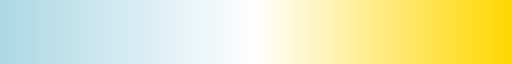

In [4]:
colors_gold = [col_sfondo, "White", "Gold"]
cmap_gold = mpl.colors.LinearSegmentedColormap.from_list("cmap_gold", colors_gold)
cmap_gold

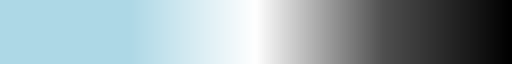

In [5]:
colors_silver = [col_sfondo, col_sfondo, "White", "#4F4F4F", "Black"]
cmap_silver = mpl.colors.LinearSegmentedColormap.from_list("cmap_silver", colors_silver)
cmap_silver

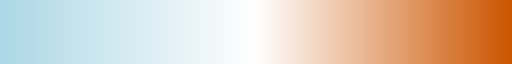

In [6]:
colors_bronze = [col_sfondo, "White", "#CC5500"]
cmap_bronze = mpl.colors.LinearSegmentedColormap.from_list("cmap_bronze", colors_bronze)
cmap_bronze

## Creazione del grafico delle 3 medaglie

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [8]:
Reg["R_bronzo"] = Reg["r_bronzo"] * 100
Reg["R_argento"] = Reg["r_argento"] * 100
Reg["R_oro"] = Reg["r_oro"] * 100
Reg.head(1)

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,persone,n_menzione,n_bronzo,n_argento,n_oro,...,r_bronzo,r_argento,r_oro,r_medaglie,pos_media,pos_median,geometry,R_bronzo,R_argento,R_oro
0,1,1,Piemonte,1.234644e+06,2.539164e+10,414,81,100,82,35,...,0.241546,0.198068,0.084541,0.524155,138.094203,131.0,"POLYGON ((457749.464 5145501.795, 458662.395 5...",24.154589,19.806763,8.454106


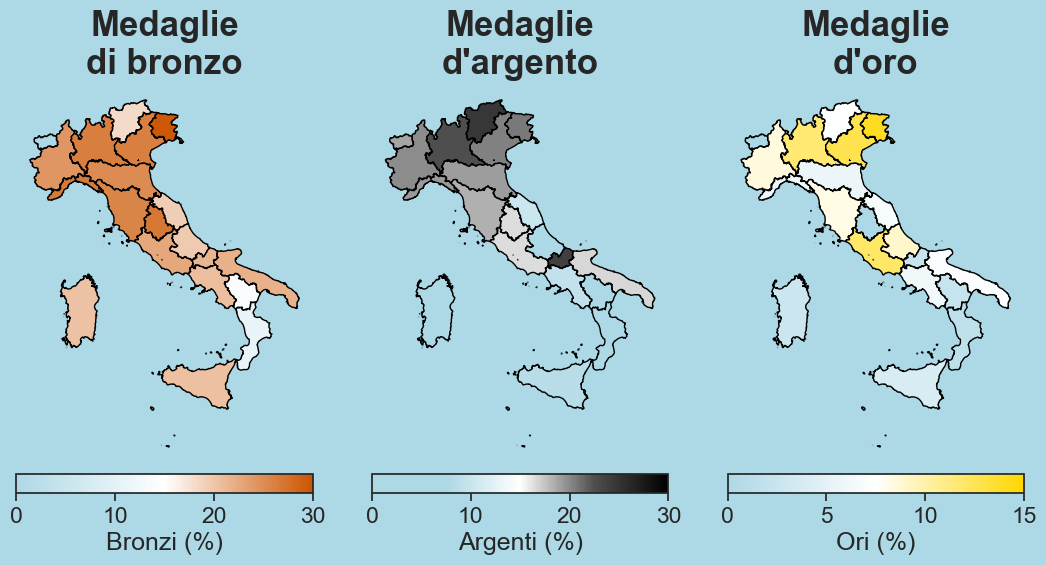

In [13]:
sns.set( style="white", font_scale=1.5 )

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(13, 7))

k_parti = 10
col_linee = "Black"
spess_linee = 1


# BRONZO

divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("bottom", size="5%", pad=0.1)

Reg.plot(
    ax=ax1,
    column="R_bronzo",
    
    #scheme="equal_interval",
    cmap=cmap_bronze,
    #k=k_parti,
    
    edgecolor=col_linee,
    linewidth=spess_linee,

    vmin=0,
    vmax=30,
    legend=True,
    cax=cax1,
    legend_kwds={"label": "Bronzi (%)", "orientation": "horizontal"}
)
ax1.set_title("Medaglie\ndi bronzo", fontweight="bold", fontsize=25)
ax1.set_axis_off()


# ARGENTO

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("bottom", size="5%", pad=0.1)

Reg.plot(
    ax=ax2,
    column="R_argento",
    
    #scheme="equal_interval",
    cmap=cmap_silver,
    #k=k_parti,
    
    edgecolor=col_linee,
    linewidth=spess_linee,

    vmin=0,
    vmax=30,
    legend=True,
    cax=cax2,
    legend_kwds={"label": "Argenti (%)", "orientation": "horizontal"}
)
ax2.set_title("Medaglie\nd'argento", fontweight="bold", fontsize=25)
ax2.set_axis_off()


# ORO

divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("bottom", size="5%", pad=0.1)

Reg.plot(
    ax=ax3,
    column="R_oro",
    
    #scheme="equal_interval",
    cmap=cmap_gold,
    #k=k_parti,
    
    edgecolor=col_linee,
    linewidth=spess_linee,

    vmin=0,
    vmax=15,
    legend=True,
    cax=cax3,
    legend_kwds={"label": "Ori (%)", "orientation": "horizontal"}
)
ax3.set_title("Medaglie\nd'oro", fontweight="bold", fontsize=25)
ax3.set_axis_off()

#fig.suptitle("Titolo generale")
fig.set_facecolor(col_sfondo); # definito prima delle colormap

# Salvataggio figura
plt.savefig("image/BronzoArgentoOroRegioni.png", bbox_inches="tight", pad_inches=0.3, transparent=False)
plt.savefig("image/BronzoArgentoOroRegioni.svg", bbox_inches="tight", pad_inches=0.3, transparent=False)

In [10]:
Reg.describe()

,COD_RIP,COD_REG,Shape_Leng,Shape_Area,persone,n_menzione,n_bronzo,n_argento,n_oro,n_medaglie,r_menzione,r_bronzo,r_argento,r_oro,r_medaglie,pos_media,pos_median,R_bronzo,R_argento,R_oro
count,20.000000,20.00000,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2.900000,10.50000,9.223607e+05,1.510347e+10,240.850000,47.150000,56.450000,40.650000,20.200000,117.300000,0.214643,0.210013,0.153791,0.064100,0.427903,154.681786,154.900000,21.001299,15.379063,6.409979
std,1.333772,5.91608,3.399314e+05,7.448508e+09,180.889985,31.576599,47.936883,40.176289,22.054001,108.822453,0.042110,0.067114,0.066576,0.041653,0.139458,26.183383,34.483635,6.711446,6.657630,4.165315
min,1.000000,1.00000,3.111871e+05,3.258608e+09,16.000000,5.000000,0.000000,2.000000,0.000000,3.000000,0.145078,0.000000,0.038462,0.000000,0.161538,116.746114,105.000000,0.000000,3.846154,0.000000
25%,2.000000,5.75000,6.192655e+05,9.124399e+09,116.250000,25.000000,21.000000,9.750000,2.750000,31.250000,0.188082,0.195860,0.091373,0.026786,0.353068,138.290080,133.000000,19.586031,9.137341,2.678571
50%,3.000000,10.50000,8.689610e+05,1.444025e+10,171.500000,28.500000,48.500000,29.000000,12.000000,93.500000,0.210449,0.216358,0.175557,0.064259,0.466764,148.659204,149.500000,21.635787,17.555729,6.425861
75%,4.000000,15.25000,1.195876e+06,2.262262e+10,385.750000,76.000000,95.250000,70.000000,28.500000,195.250000,0.233037,0.258146,0.199516,0.085947,0.520982,172.066028,175.500000,25.814586,19.951639,8.594678
max,5.000000,20.00000,1.449231e+06,2.582432e+10,695.000000,104.000000,183.000000,157.000000,81.000000,421.000000,0.312500,0.295337,0.247934,0.139896,0.642487,213.623077,230.000000,29.533679,24.793388,13.989637


In [11]:
ax1

<Axes: title={'center': 'Medaglie\ndi bronzo'}>